# Overview
A simple first exercise in building a convolutional neural network, and with TensorFlow.

### Goal
Train a fashion items classifier using the Fashion MNIST dataset labels.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

# Data

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(f"train_imgs: {train_imgs.shape}, {type(train_imgs)}")

train_imgs: (60000, 28, 28), <class 'numpy.ndarray'>


First image: (28, 28), <class 'numpy.ndarray'>


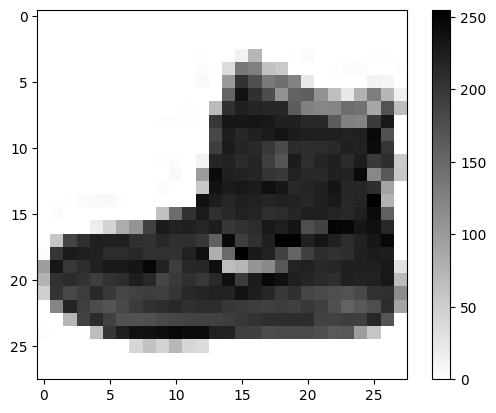

label = 9


In [5]:
print(f"First image: {train_imgs[0].shape}, {type(train_imgs[0])}")

plt.figure()
plt.imshow(train_imgs[0], cmap="binary")
plt.colorbar()
plt.grid(False)
plt.show()

print(f"label = {train_labels[0]}")

In [6]:
print(f"test set size: {train_labels.size}")

test set size: 60000


Labels are integers. Keep track of which are which according to [dataset docs](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data#the_classes_are).

In [7]:
CLASS_NAMES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

_Important_
### Normalize the Data
RGB image--every pixel is a triplet of three values each $\in [0, 256)$.

In [8]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

First image: (28, 28), <class 'numpy.ndarray'>


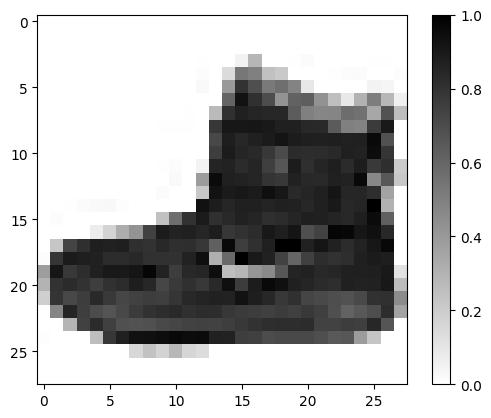

label = Ankle boot


In [9]:
print(f"First image: {train_imgs[0].shape}, {type(train_imgs[0])}")

plt.figure()
plt.imshow(train_imgs[0], cmap="binary")
plt.colorbar()
plt.grid(False)
plt.show()

print(f"label = {CLASS_NAMES[train_labels[0]]}")

# Set up the Model
Since this is image classification, let's fine tune a variant of ResNet, MobileNet.

Slap on some flips and rotation steps beforehand.

In [10]:
aug_data = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
])

Fine-tuning => throw out and replace last (classification) layer. Leave all other layers be from now.

In [ ]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=train_imgs[0].shape,
                                                    include_top=False,
                                                    include_preprocessing=True)
base_model.trainable = False